# Reinforcement Learning

## Q-Learning Example

In [2]:
import gym

In [3]:
env = gym.make("FrozenLake-v1")

In [4]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [5]:
# reset enviornment to default state
env.reset()

(0, {'prob': 1})

In [6]:
# get a random action
action = env.action_space.sample()

In [9]:
# take action notice it returns information about the action
observation, reward, done, truncated, info = env.step(action)

In [12]:
# render the GUI for the enviorment
env.render()

## Frozen Lake Enviornment

### Build Model

In [14]:
import gym
import numpy as np
import time

In [17]:
env = gym.make("FrozenLake")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

c:\Users\zuoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\envs\registration.py:563: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(


In [19]:
Q = np.zeros((STATES, ACTIONS))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Constants

In [21]:
# how many times to run the enviornment from the begining
EPISODES = 2000
# max number of steps allowed for each run of enviornment
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

### Picking an Action

In [22]:
# start with a 90% chance of picking a random action
epsilon = 0.9

if np.random.uniform(0,1) < epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(Q[state, :])

### Updating Q Values

In [23]:
# Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) = Q[state, action])

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3975565198.py, line 1)

### Putting it Together

In [54]:
import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

# how many times to run the enviornment from the begining
EPISODES = 20000
# max number of steps allowed for each run of enviornment
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

# if you want to see taining set to true
RENDER = False

epsilon = 0.9

In [55]:
rewards = []
for episode in range(EPISODES):
    state, _ = env.reset()

    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break

print(Q)
print(f"\nAverage reward: {sum(rewards) / len(rewards)}")

c:\Users\zuoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[2.56042668e-01 4.00926674e-03 4.88876176e-03 5.28327361e-03]
 [2.12256987e-03 8.48023823e-04 1.50874470e-03 3.72636589e-01]
 [8.53219938e-04 1.11160938e-01 2.63485199e-03 3.03102432e-03]
 [1.89232588e-03 4.69705487e-04 1.72938392e-03 8.84907587e-02]
 [4.29743733e-01 5.96759958e-03 3.81705316e-03 2.27414394e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.82369337e-08 2.13005996e-07 4.73333380e-03 1.15630396e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.20787844e-03 2.79991281e-03 1.93960473e-03 2.75373380e-01]
 [2.76704406e-03 6.15560435e-01 2.09670337e-03 2.26946626e-04]
 [7.88986067e-01 1.55205787e-04 1.21574167e-04 1.39137822e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.10688665e-02 2.17125447e-03 8.96829827e-01 9.18670615e-03]
 [8.86330168e-02 9.96145935e-01 8.86450053e-02 4.26199970e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [51]:
# plot the training progress and how agent imporved
import matplotlib.pyplot as plt 

In [52]:
def get_average(values):
    return sum(values) / len(values)

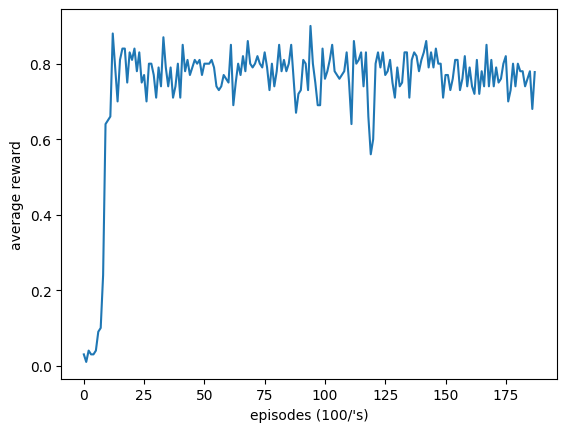

In [56]:
avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel("average reward")
plt.xlabel("episodes (100/'s)")
plt.show()